# Çoklu Doğrusal Regresyon

#### Temel amaç ; bağımlı ve bağımsız değişkenler arasındaki ilişikiyi ifade eden doğrusal fonksiyonu bulmaktır.

\begin{align} 
y = B_0 + B_1X_1+...+B_jX_j+...+BpXp + e_p   (Basit Dogrusal Regresyon Denklemi)
\end{align}

##### Verileri https://www.kaggle.com/timoboz/tesla-stock-data-from-2010-to-2020#TSLA.csv adresinden bulabilirsiniz

### Veri Özeti

In [1]:
# Tesla'nın 2010 yılından 2020'ye kadar olan hisse fiyatları
# Date : Tarih
# Open : Açılış Fiyatı
# High : O günün en yüksek fiyatı
# Low  : O gün en düşük fiyat
# Close : Kapanış Fiyatı
# Adj Close : Düzeltilmiş kapanış fiyatı
# Volume : İşlem Hacmi

##### Modüller Eklenir

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

##### İstenilen veri tablosu alınır

In [3]:
tesla=pd.read_csv("data/tesla.csv")
df=tesla.copy()

##### Verinin ilk 5 satırı gösterilir

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


##### Verinin son 5 satırı gösterilir

In [5]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300
2415,2020-02-03,673.690002,786.140015,673.520020,780.000000,780.000000,47065000


##### Verinin özellikleri incelenir

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
Date         2416 non-null object
Open         2416 non-null float64
High         2416 non-null float64
Low          2416 non-null float64
Close        2416 non-null float64
Adj Close    2416 non-null float64
Volume       2416 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


##### İstenilen sütun ayırılır

In [7]:
df=df[["Open","High","Low","Close"]]

##### Verinin ilk 5 satırı gösterilir

In [8]:
df.head()

,Open,High,Low,Close
0,19.000000,25.00,17.540001,23.889999
1,25.790001,30.42,23.299999,23.830000
2,25.000000,25.92,20.270000,21.959999
3,23.000000,23.10,18.709999,19.200001
4,20.000000,20.00,15.830000,16.110001


##### Değişkenlerin yapıları istatistiksel olarak incelenir

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,2416.0,186.271147,118.740163,16.139999,34.342498,213.035003,266.450012,673.690002
High,2416.0,189.578224,120.892329,16.629999,34.897501,216.745002,270.927513,786.140015
Low,2416.0,182.916639,116.857591,14.980000,33.587501,208.870002,262.102501,673.520020
Close,2416.0,186.403651,119.136020,15.800000,34.400002,212.960007,266.774994,780.000000


#####  İki değişken arasındaki ilişkinin değeri (korelasyon) incelenir

In [10]:
df.corr()

,Open,High,Low,Close
Open,1.000000,0.999425,0.999575,0.998886
High,0.999425,1.000000,0.999389,0.999640
Low,0.999575,0.999389,1.000000,0.999447
Close,0.998886,0.999640,0.999447,1.000000


##### Veriler yardımıyla histogram ve regresyon dağılımı bir arada incelenir

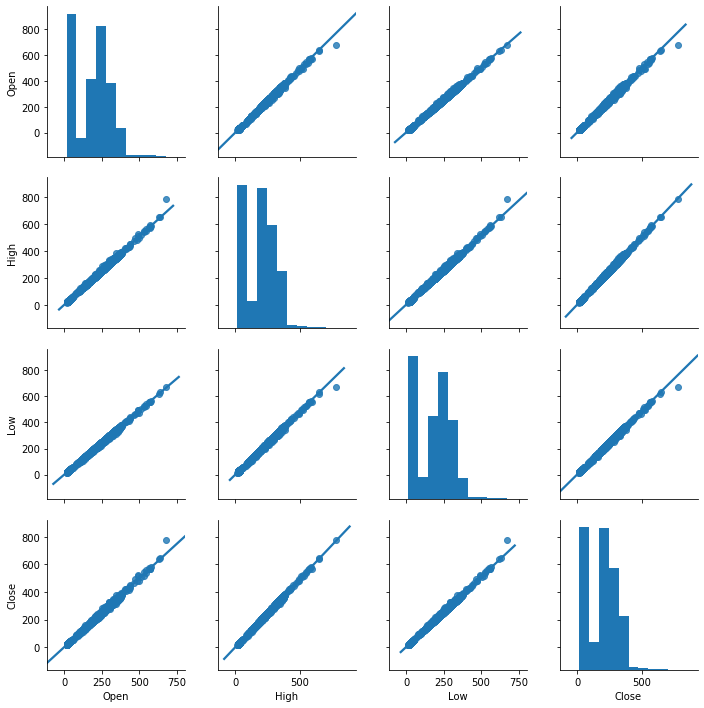

In [11]:
sns.pairplot(df,kind="reg")

In [12]:
sns.set(rc={"figure.figsize":(12,7)},style="whitegrid")

##### Veriler yardımıyla bir tabloda istenilen değişkenlerin regresyon ilişkisi incelenir

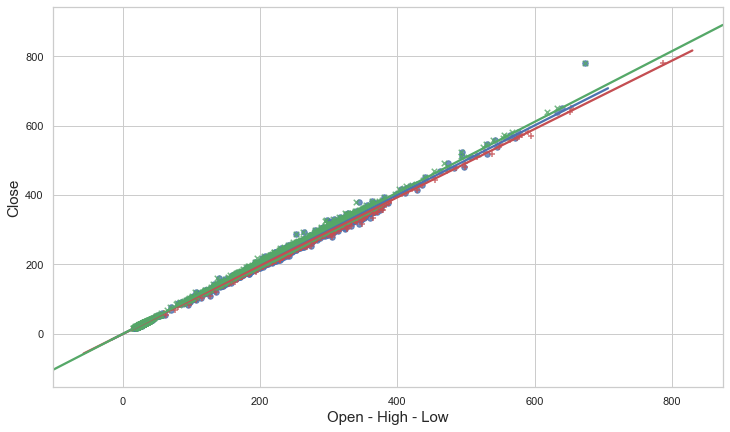

In [13]:
g=sns.regplot(x="Open",y="Close",data=df,color="b",scatter_kws={"s":30},marker="o")
g=sns.regplot(x="High",y="Close",data=df,color="r",scatter_kws={"s":30},marker="+")
g=sns.regplot(x="Low",y="Close",data=df,color="g",scatter_kws={"s":30},marker="x")
g.set_xlabel("Open - High - Low",size=15)
g.set_ylabel("Close",size=15);

##### Basit doğrusal yöntemlerden bir tanesi olan statsmodel modülü eklenir

In [14]:
import statsmodels.api as sm

#### Bağımsız değişkenler : (Open,High,Low) ve bağımlı değişken : (Close) olarak seçilip ayrı veri kümesine atanır

In [15]:
X=df[["Open","High","Low"]]
Y=df[["Close"]]

##### Bağımsız değişkenlerin olduğu tabloya sabit eklenir

In [16]:
X=sm.add_constant(X)

C:\Users\ASUS\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [17]:
X.head()

,const,Open,High,Low
0,1.0,19.000000,25.00,17.540001
1,1.0,25.790001,30.42,23.299999
2,1.0,25.000000,25.92,20.270000
3,1.0,23.000000,23.10,18.709999
4,1.0,20.000000,20.00,15.830000


In [18]:
Y.head()

,Close
0,23.889999
1,23.830000
2,21.959999
3,19.200001
4,16.110001


##### Model tanıtılır ve ardından ilişki tablosu gösterilir

In [19]:
model=sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.766e+06
Date:                Sat, 04 Apr 2020   Prob (F-statistic):               0.00
Time:                        13:32:28   Log-Likelihood:                -5139.2
No. Observations:                2416   AIC:                         1.029e+04
Df Residuals:                    2412   BIC:                         1.031e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0697      0.077     -0.905      0.365      -0.221       0.081
Open          -0.6526      0.013    -48.719      0.000      -0.679      -0.626
High           0.8905      0.011     81.148      0.000       0.869       0.912
Low            0.7610      0.013     57.645      0.000       0.735       0.787
==============================================================================
Omnibus:                      288.403   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1618.756
Skew:                          -0.416   Prob(JB):                         0.00
Kurtosis:                       6.923   Cond. No.                         713.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,-0.0697,0.077,-0.905,0.365,-0.221,0.081
Open,-0.6526,0.013,-48.719,0.000,-0.679,-0.626
High,0.8905,0.011,81.148,0.000,0.869,0.912
Low,0.7610,0.013,57.645,0.000,0.735,0.787


##### Not : P > |t| bize bağımsız değişkenlerden çıkan katsayının istatistiksel olarak anlamlı olup olmadığını söylemektedir.Genel olarak kabul edilen değer x<0.05'dir

##### Değişkenlerin katsayıları gösterilir

In [21]:
model.params

const   -0.069741
Open    -0.652589
High     0.890527
Low      0.761043
dtype: float64

#### Parametre sonucunda oluşan denklem : Close = -0.069741 + Open * -0.652589 *  + High * 0.890527 + Low * 0.761043

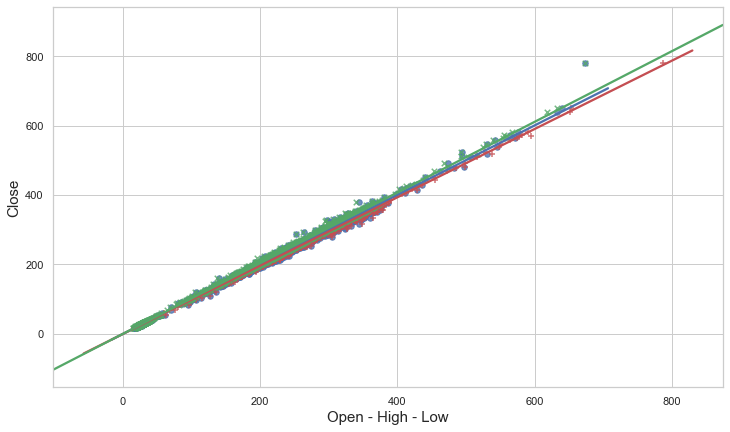

In [22]:
g=sns.regplot(x="Open",y="Close",data=df,color="b",scatter_kws={"s":30},marker="o")
g=sns.regplot(x="High",y="Close",data=df,color="r",scatter_kws={"s":30},marker="+")
g=sns.regplot(x="Low",y="Close",data=df,color="g",scatter_kws={"s":30},marker="x")
g.set_xlabel("Open - High - Low",size=15)
g.set_ylabel("Close",size=15);

##### Bağımsız değişkenlerden tahmin y değerleri gösterilir

In [23]:
model.fittedvalues[:10] #Tahmin y değerleri

0    23.142929
1    27.922110
2    22.124326
3    19.730991
4    16.736322
5    15.437681
6    16.848940
7    16.993432
8    17.245833
9    18.042780
dtype: float64

In [24]:
Y[:10] # Gerçek y değerleri

,Close
0,23.889999
1,23.830000
2,21.959999
3,19.200001
4,16.110001
5,15.800000
6,17.459999
7,17.400000
8,17.049999
9,18.139999


##### İkinci yöntem olan sklearn modülü getirilir

In [25]:
from sklearn.linear_model import LinearRegression

##### Bağımsız değişken ve bağımlı değişkenler yeniden atanır bu sefer sabit kullanılmayacak

In [26]:
X=df[["Open","High","Low"]]
Y=df["Close"]

In [27]:
X.head()

,Open,High,Low
0,19.000000,25.00,17.540001
1,25.790001,30.42,23.299999
2,25.000000,25.92,20.270000
3,23.000000,23.10,18.709999
4,20.000000,20.00,15.830000


In [28]:
Y.head()

0    23.889999
1    23.830000
2    21.959999
3    19.200001
4    16.110001
Name: Close, dtype: float64

##### Model tanıtılır

In [29]:
model=LinearRegression().fit(X,Y)

##### Model'in B0 katsayısı gösterilir

In [30]:
model.intercept_

-0.06974121039004899

##### Model'in B1,B2,B3 katsayıları gösterilir

In [31]:
model.coef_

array([-0.65258914,  0.89052664,  0.76104318])

##### Tahmin değer yapılır . Örneğin Open=20 , High=30 ve Low=10  ise Close tahmin olarak kaçtır ? (Amaç bağımsız değişkenlere değer verdiğimizde bağımlı değişkeni bulmaktır)

In [32]:
veriler=[[20],[30],[10]]

In [33]:
veriler=pd.DataFrame(veriler).T

##### Bağımsız değişkenlerin tahmin  Close değerleri gösterilir

In [34]:
model.predict(X)[:5]

array([23.14292924, 27.9221099 , 22.12432601, 19.73099105, 16.73632229])

In [35]:
Y.head()

0    23.889999
1    23.830000
2    21.959999
3    19.200001
4    16.110001
Name: Close, dtype: float64

##### Bağımsız değerleri sırasıyla 20,30,10 verdiğimizde Close tahmin olarak aşağıdaki sonuç çıkmaktadır

In [36]:
model.predict(veriler)

array([21.20470698])

##### Gercek ve Tahmin y (Close) değerlerini bir arada görmek için tablo oluşturulur

In [37]:
df_hesap=pd.DataFrame({"gercek_y":Y,"tahmin_y":model.predict(X)})

In [38]:
df_hesap.head()

,gercek_y,tahmin_y
0,23.889999,23.142929
1,23.830000,27.922110
2,21.959999,22.124326
3,19.200001,19.730991
4,16.110001,16.736322


##### Gerçek ve tahmin y değerler arasındaki farkları görmek için yeni sütun eklenir

In [39]:
df_hesap["fark"]=df_hesap["gercek_y"]-df_hesap["tahmin_y"]

In [40]:
df_hesap.head()

,gercek_y,tahmin_y,fark
0,23.889999,23.142929,0.747070
1,23.830000,27.922110,-4.092110
2,21.959999,22.124326,-0.164327
3,19.200001,19.730991,-0.530990
4,16.110001,16.736322,-0.626321


#### Farklar çizgi grafikle gösterilir

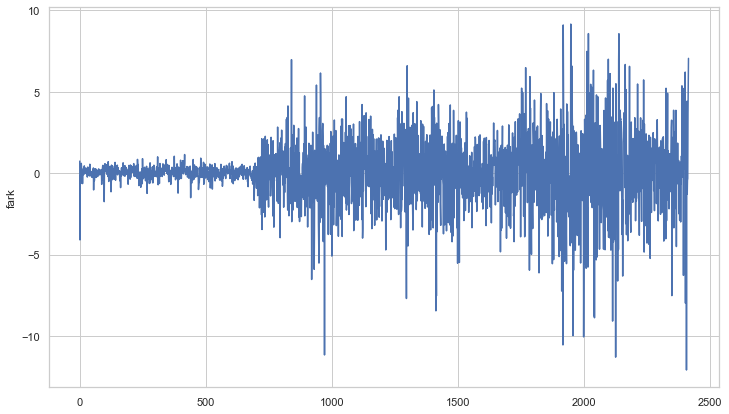

In [41]:
sns.lineplot(df_hesap.index,df_hesap["fark"])

#### Şekildede görüldüğü gibi farklar '-' ve '+' yani yön bulundurduğundan  '- ' lerden kurtulmak için farkların karesi alınır

In [42]:
df_hesap["fark_kare"]=df_hesap["fark"]**2

In [43]:
df_hesap.head()

,gercek_y,tahmin_y,fark,fark_kare
0,23.889999,23.142929,0.747070,0.558113
1,23.830000,27.922110,-4.092110,16.745363
2,21.959999,22.124326,-0.164327,0.027003
3,19.200001,19.730991,-0.530990,0.281950
4,16.110001,16.736322,-0.626321,0.392278


##### MSE değeri hesaplanır

In [44]:
mse=np.mean(df_hesap["fark_kare"])
mse

4.122490297029608

##### RMSE değeri hesaplanır

In [45]:
rmse=np.sqrt(mse)
rmse

2.0303916609929247